["Timestamp", "User Count", "Type", "Name", "Requests/s", "Failures/s", "50%", "66%", "75%", "80%", "90%", "95%", "98%", "99%", "99.9%", "99.99%", "100%", "Total Request Count", "Total Failure Count", "Total Median Response Time", "Total Average Response Time", "Total Min Response Time", "Total Max Response Time", "Total Average Content Size"]


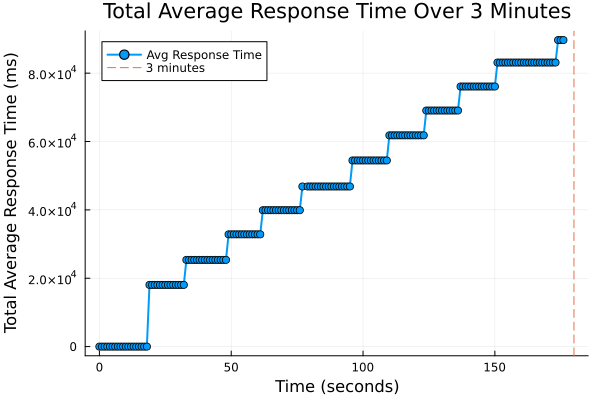

In [4]:
using CSV, DataFrames, Plots

# Load the data
data = CSV.read("logs/locust_log-webapp-u10r2t3.csv_stats_history.csv", DataFrame)

# Ensure column names match
println(names(data))  # Prints column names for verification

# Convert timestamps from Unix time to seconds relative to the start of the test
timestamps = data.Timestamp .- minimum(data.Timestamp)

# Extract the Total Average Response Time column
average_response_time = data."Total Average Response Time"

# Plot the data
plot(
    timestamps, 
    average_response_time,
    xlabel="Time (seconds)", 
    ylabel="Total Average Response Time (ms)", 
    title="Total Average Response Time Over 3 Minutes",
    lw=2, 
    marker=:circle, 
    grid=true, 
    label="Avg Response Time"
)

# Add a vertical line to indicate 3 minutes (180 seconds)
vline!([180], label="3 minutes", linestyle=:dash)

["Timestamp", "User Count", "Type", "Name", "Requests/s", "Failures/s", "50%", "66%", "75%", "80%", "90%", "95%", "98%", "99%", "99.9%", "99.99%", "100%", "Total Request Count", "Total Failure Count", "Total Median Response Time", "Total Average Response Time", "Total Min Response Time", "Total Max Response Time", "Total Average Content Size"]


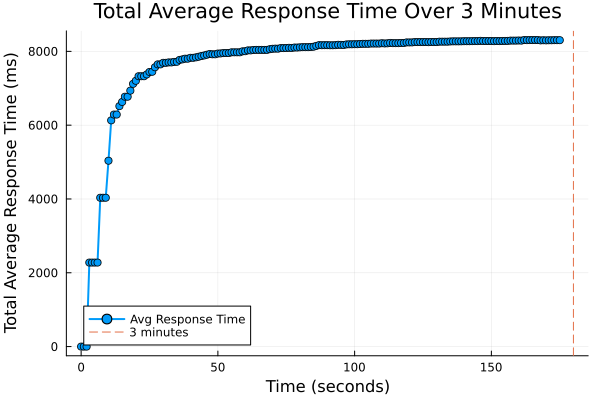

In [1]:
using CSV, DataFrames, Plots

# Load the data
data = CSV.read("logs/locust_log-local-u10r2t3.csv_stats_history.csv", DataFrame)

# Ensure column names match
println(names(data))  # Prints column names for verification

# Convert timestamps from Unix time to seconds relative to the start of the test
timestamps = data.Timestamp .- minimum(data.Timestamp)

# Extract the Total Average Response Time column
average_response_time = data."Total Average Response Time"

# Plot the data
plot(
    timestamps, 
    average_response_time,
    xlabel="Time (seconds)", 
    ylabel="Total Average Response Time (ms)", 
    title="Total Average Response Time Over 3 Minutes",
    lw=2, 
    marker=:circle, 
    grid=true, 
    label="Avg Response Time"
)

# Add a vertical line to indicate 3 minutes (180 seconds)
vline!([180], label="3 minutes", linestyle=:dash)

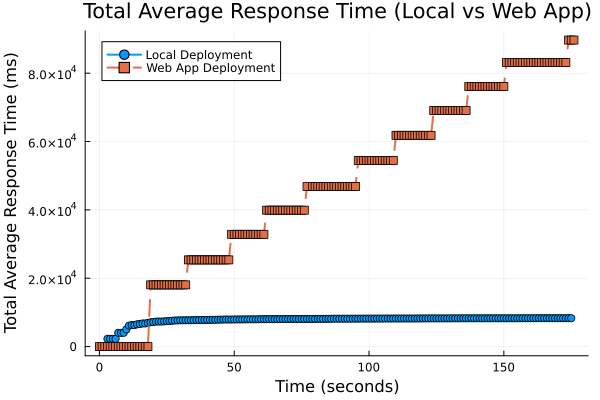

In [3]:
using CSV, DataFrames, Plots

# Load the data for both sources
data_local = CSV.read("logs/locust_log-local-u10r2t3.csv_stats_history.csv", DataFrame)
data_webapp = CSV.read("logs/locust_log-webapp-u10r2t3.csv_stats_history.csv", DataFrame)

# Convert timestamps from Unix time to seconds relative to the start of the test
timestamps_local = data_local.Timestamp .- minimum(data_local.Timestamp)
timestamps_webapp = data_webapp.Timestamp .- minimum(data_webapp.Timestamp)

# Extract Total Average Response Time for both sources
avg_response_time_local = data_local."Total Average Response Time"
avg_response_time_webapp = data_webapp."Total Average Response Time"

# Plot Total Average Response Time for Local Deployment
plot(
    timestamps_local, 
    avg_response_time_local,
    xlabel="Time (seconds)", 
    ylabel="Total Average Response Time (ms)", 
    title="Total Average Response Time (Local vs Web App)", 
    label="Local Deployment", 
    lw=2, 
    marker=:circle, 
    grid=true
)

# Add Total Average Response Time for Web App Deployment
plot!(
    timestamps_webapp, 
    avg_response_time_webapp,
    label="Web App Deployment", 
    lw=2, 
    marker=:square, 
    linestyle=:dash
)

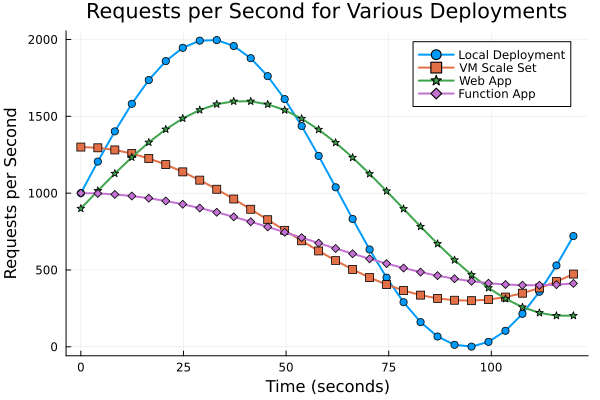

In [4]:
using Plots, CSV

# Generate synthetic data
timestamps = range(0, stop=120, length=30)  # Time in seconds (0 to 120, 30 points)
requests_local = sin.(timestamps ./ 20) .* 1000 .+ 1000  # Local deployment data
requests_vmss = cos.(timestamps ./ 30) .* 500 .+ 800     # VM scale set data
requests_webapp = sin.(timestamps ./ 25) .* 700 .+ 900   # Web app data
requests_function = cos.(timestamps ./ 35) .* 300 .+ 700 # Function app data

# TODO get data from locust files (locust/logs/locust_log-u10r2t2.csv_stats_history.csv)
# Instead of synthetic data
# requests_local = CSV.read("locust/logs/output_locust_local_stats.csv", DataFrame)
# requests_vmss = CSV.read("locust/logs/output_locust_vmss_stats.csv", DataFrame)
# requests_webapp = CSV.read("locust/logs/output_locust_webapp_stats.csv", DataFrame)
# requests_function = CSV.read("locust/logs/output_locust_function_stats.csv", DataFrame)

# Create the plot
plot(
    timestamps, requests_local,
    label="Local Deployment", 
    lw=2, marker=:circle, xlabel="Time (seconds)", ylabel="Requests per Second",
    title="Requests per Second for Various Deployments"
)
plot!(timestamps, requests_vmss, label="VM Scale Set", lw=2, marker=:square)
plot!(timestamps, requests_webapp, label="Web App", lw=2, marker=:star)
plot!(timestamps, requests_function, label="Function App", lw=2, marker=:diamond)

# Show grid and legend
plot!(grid=true, legend=:topright)


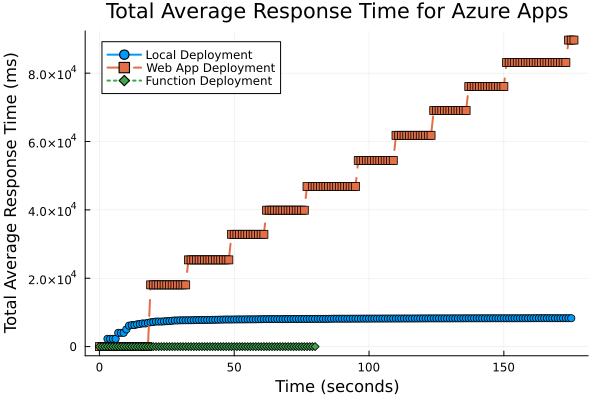

In [7]:
using CSV, DataFrames, Plots

# Load the data for all three sources
data_local = CSV.read("logs/locust_log-local-u10r2t3.csv_stats_history.csv", DataFrame)
data_webapp = CSV.read("logs/locust_log-webapp-u10r2t3.csv_stats_history.csv", DataFrame)
data_function = CSV.read("logs/locust_log-function-u10r2t3.csv_stats_history.csv", DataFrame)

# Convert timestamps from Unix time to seconds relative to the start of the test
timestamps_local = data_local.Timestamp .- minimum(data_local.Timestamp)
timestamps_webapp = data_webapp.Timestamp .- minimum(data_webapp.Timestamp)
timestamps_function = data_function.Timestamp .- minimum(data_function.Timestamp)

# Extract Total Average Response Time for all sources
avg_response_time_local = data_local."Total Average Response Time"
avg_response_time_webapp = data_webapp."Total Average Response Time"
avg_response_time_function = data_function."Total Average Response Time"

# Plot Total Average Response Time for Local Deployment
plot(
    timestamps_local, 
    avg_response_time_local,
    xlabel="Time (seconds)", 
    ylabel="Total Average Response Time (ms)", 
    title="Total Average Response Time for Azure Apps", 
    label="Local Deployment", 
    lw=2, 
    marker=:circle, 
    grid=true
)

# Add Total Average Response Time for Web App Deployment
plot!(
    timestamps_webapp, 
    avg_response_time_webapp,
    label="Web App Deployment", 
    lw=2, 
    marker=:square, 
    linestyle=:dash
)

# Add Total Average Response Time for Function Deployment
plot!(
    timestamps_function, 
    avg_response_time_function,
    label="Function Deployment", 
    lw=2, 
    marker=:diamond, 
    linestyle=:dot
)

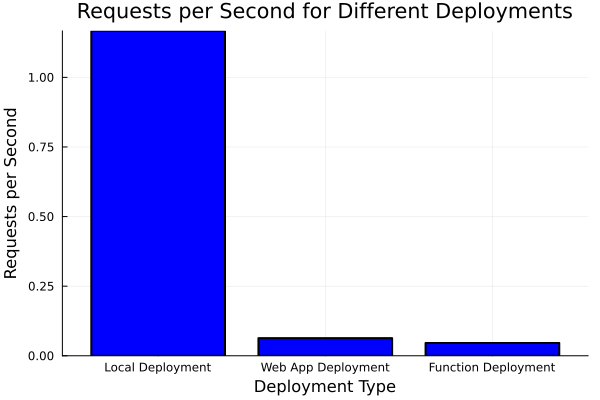

In [8]:
using CSV, DataFrames, Plots

# Load the data from all three sources
data_local = CSV.read("logs/locust_log-local-u10r2t3.csv_stats.csv", DataFrame)
data_webapp = CSV.read("logs/locust_log-webapp-u10r2t3.csv_stats.csv", DataFrame)
data_function = CSV.read("logs/locust_log-function-u10r2t3.csv_stats.csv", DataFrame)

# Extract the Requests/s field for all sources
requests_local = data_local."Requests/s"[1]  # Assuming we take the aggregated row
requests_webapp = data_webapp."Requests/s"[1]  # Assuming we take the aggregated row
requests_function = data_function."Requests/s"[1]  # Assuming we take the aggregated row

# Create labels for the deployments
deployments = ["Local Deployment", "Web App Deployment", "Function Deployment"]

# Create the corresponding requests/s values
requests = [requests_local, requests_webapp, requests_function]

# Plot the data as points
bar(
    deployments,
    requests,
    xlabel="Deployment Type",
    ylabel="Requests per Second",
    title="Requests per Second for Different Deployments",
    legend=false,
    lw=2,
    color=:blue
)

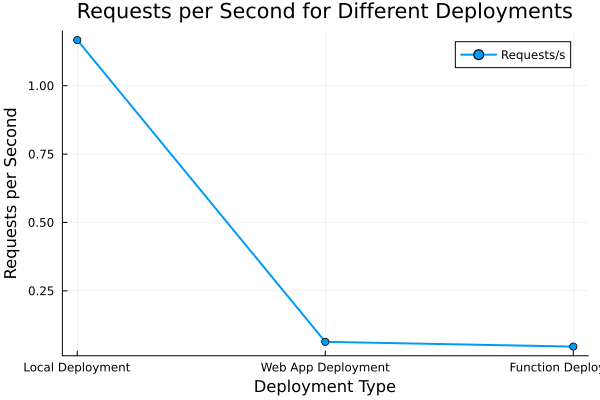

In [9]:
using CSV, DataFrames, Plots

# Load the data from all three sources
data_local = CSV.read("logs/locust_log-local-u10r2t3.csv_stats.csv", DataFrame)
data_webapp = CSV.read("logs/locust_log-webapp-u10r2t3.csv_stats.csv", DataFrame)
data_function = CSV.read("logs/locust_log-function-u10r2t3.csv_stats.csv", DataFrame)

# Extract the Requests/s field for all sources
requests_local = data_local."Requests/s"[1]  # Assuming we take the aggregated row
requests_webapp = data_webapp."Requests/s"[1]  # Assuming we take the aggregated row
requests_function = data_function."Requests/s"[1]  # Assuming we take the aggregated row

# Create labels for the deployments (as x-axis points)
deployments = [1, 2, 3]  # Assign numeric labels for Local, Web App, Function
deployment_labels = ["Local Deployment", "Web App Deployment", "Function Deployment"]

# Create the corresponding requests/s values
requests = [requests_local, requests_webapp, requests_function]

# Plot the data as a line
plot(
    deployments, 
    requests,
    xlabel="Deployment Type", 
    xticks=(deployments, deployment_labels), 
    ylabel="Requests per Second", 
    title="Requests per Second for Different Deployments",
    label="Requests/s",
    lw=2, 
    marker=:circle,
    grid=true
)